# Introduction to scikit-learn \#1#

In this class we are going to briefly introduce the Machine Learning basics and scikit-learn API.

We are going to introduce **Supervised** and **Unsupervised** methods, referring to the underlying scikit-learn objects.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2

## Estimator object ##

The estimator is the predominant object in the Scikit-learn API.

```python
estimator = estimatorObj.fit(data, labels)
```

or,

```python
estimator = estimatorObj.fit(data)
```

It is used to fit the model to some training data. It is used for supervised and unsupervised learning.

All estimators should inherit from ```sklearn.base.BaseEstimator```


All the **hyper-parameters** must be set when initializing the estimator and must have default parameters. The **hyper-parameter**'s validity should be checked on the **fit** method and not on **__init__**. This way, it is possible to change the parameters after the model creation which is necessary to perform, for instance, **GridSearch**.

In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
print reg.fit_intercept
print reg.normalize
print reg

True
False
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


The model's **parameters** are learned with the **fit** method. Notice that the model and the data are *disconnected*.

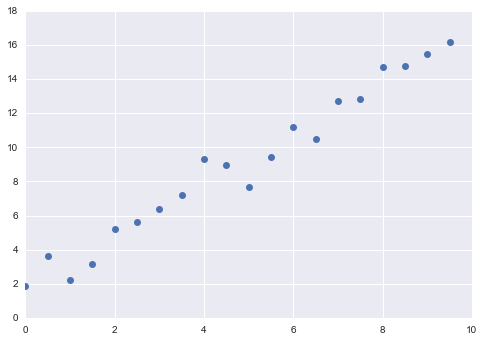

In [3]:
X = np.arange(0, 10, 0.5)
y = 1.5 * X + 2 + np.random.randn(len(X))

plt.plot(X, y, 'o')
plt.show()

**Fit**'s parameters have some requirements:

- Data must be an [n_samples x n_features] matrix.
- Labels must be an [n_samples] array.

In [4]:
X = X[:, np.newaxis]

print X.shape
print y.shape

(20L, 1L)
(20L,)


Learned parameters' names have a trailing underscore: coef\_ and intercept\_

[ 1.51412245]
1.75769029912


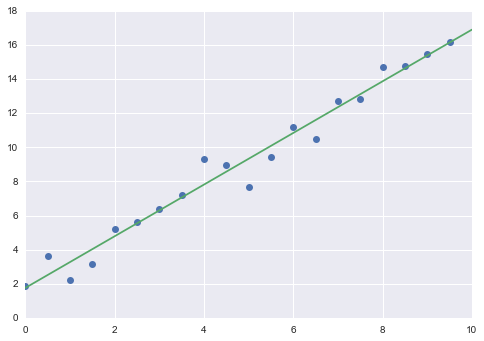

In [5]:
reg.fit(X, y)
print reg.coef_
print reg.intercept_

plt.plot(X, y, 'o')
plt.plot([0, 10], [reg.intercept_, 10 * reg.coef_[0] + reg.intercept_])
plt.show()

The API for classification problems is the same.

Let's create a synthetic dataset with the help of sklearn and train an *SVM*:

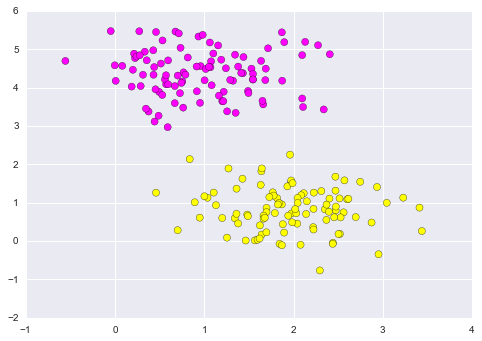

In [6]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

The make_blobs method creates a given number of blobs with a given standard deviation.

**Hint** Run ```help(make_blobs)``` or ```make_blobs?``` in a cell to get more information about the parameters of the method.

There are a lot more methods for creating synthetic datasets, you can see them on the [scikit-learn documentation](http://scikit-learn.org/stable/datasets/) or by running: 

```python
import sklearn
help(sklearn.datasets.samples_generator)
```

Now we can crate an *SVM* classifier to discriminate between the two different classes.

In [7]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (score) = 1.0


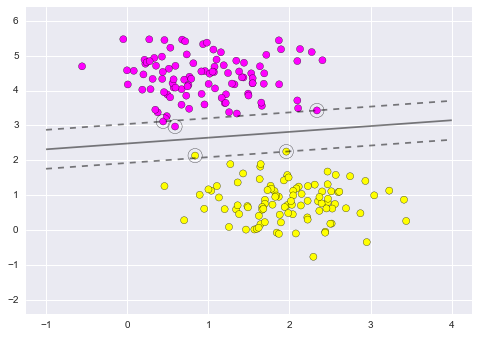

In [8]:
from visualization_helper import plot_svc_decision_function

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none');
print 'Accuracy (score) = {0}'.format(clf.score(X, y))

What am I doing that should **never** be done on a real scenario?

### Let's play a bit ###

All the estimators are created with default parameters but, we may want to change those depending on the problem we are solving.

Let's see that in action.

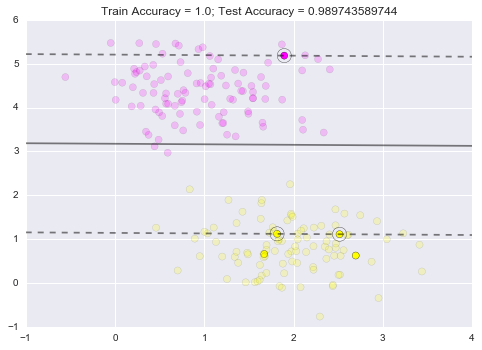

In [9]:
from IPython.html.widgets import interact
from visualization_helper import plot_svm
    
interact(plot_svm, N=[5, 200], std=[0.1, 1], kernel=('linear', 'rbf', 'poly'));

Now I am computing the accuracy on a test set that does not overlap with the training one. 

**Question:** What kernel should we use these kind of datasets?

### Unsupervised Learning ###

We have seen two examples of supervised estimators, now lets see how estimators work on the unsupervised case.

Let's fit a *K-Means* object to the same dataset we used to train the *SVM*.

In [10]:
from sklearn.cluster import KMeans

clu = KMeans(n_clusters=2)
clu.fit(X)
clu.cluster_centers_

array([[ 1.96604571,  0.82284035],
       [ 0.96362159,  4.37610353]])

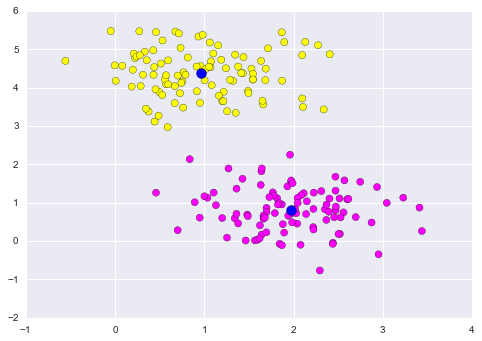

In [11]:
clu_pred = clu.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clu_pred, s=50, cmap='spring')
plt.scatter(clu.cluster_centers_[:, 0], clu.cluster_centers_[:, 1], s=100);

In order to mix *supervised* and *unsupervised* estimators in a pipeline, even *unsupervised* estimators accept the labels as an optional argument of the **fit** method:

```python
estimator = estimatorObj.fit(data, labels=None)
```

In this case, the labels are ignored by the estimator. Also, remember that the **fit** method is *idempotent* meaning that given the same data it returns the same results (unless the estimator has the *warm_start* parameter). It "forgets" the previously learned parameters and recomputes them.

In [12]:
clu.fit(X, y)
clu.cluster_centers_

array([[ 0.96362159,  4.37610353],
       [ 1.96604571,  0.82284035]])

We can also predict the *label* of each point:

In [13]:
clu_pred = clu.predict(X)
print clu_pred

[1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0]


And *tranform* it into another representation. In the *KMeans* case, it returns the distance to each of the centroids. Not all *unsupervised learning* methods implement this.

In [14]:
clu_trans = clu.transform(X)
idx = 0
print 'Transformed =', clu_trans[idx], '; Label =', clu_pred[idx], '=', np.argmin(clu_trans[idx])

Transformed = [ 3.61464117  0.62042863] ; Label = 1 = 1


### Exercise: ###

1\. Run *KMeans* on the digits dataset with 10 clusters and plot the centroids.

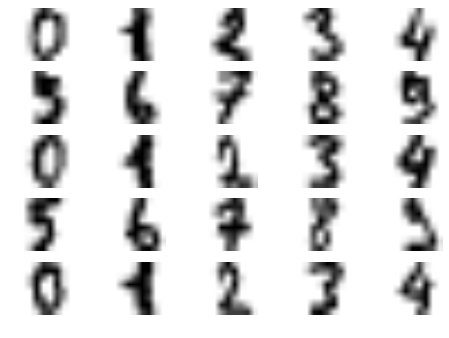

In [15]:
from sklearn.datasets import load_digits
from visualization_helper import plot_digits

digits = load_digits()

X, y = digits.data, digits.target

plot_digits()

In [ ]:
#########################################################
#                       YOUR CODE                       #
#########################################################

#########################################################
#########################################################

Compare your solution with the one on exercise_solver.py.

## Dimensionality Reduction ##

Scikit-learn also offers methods to perform *dimensionality reduction*. These methods are useful for visualization purposes or to increase the efficiency of training a model.

In this example we will start by using the iris dataset which has 4 dimensions, and reduce it to 2 dimensions in order to easily visualize the data.

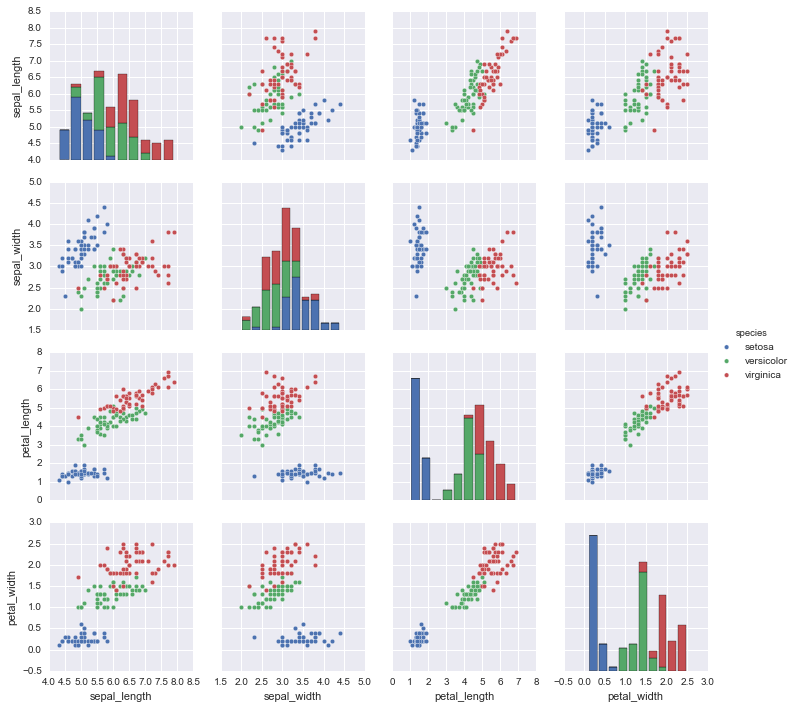

In [16]:
from sklearn.datasets import load_iris
from visualization_helper import plot_iris_dataset

iris = load_iris()
X, y = iris.data, iris.target

plot_iris_dataset()

We will use *PCA* to find a linear transformation that reduces the dimensionality of the data that better explains the variance in the data. 

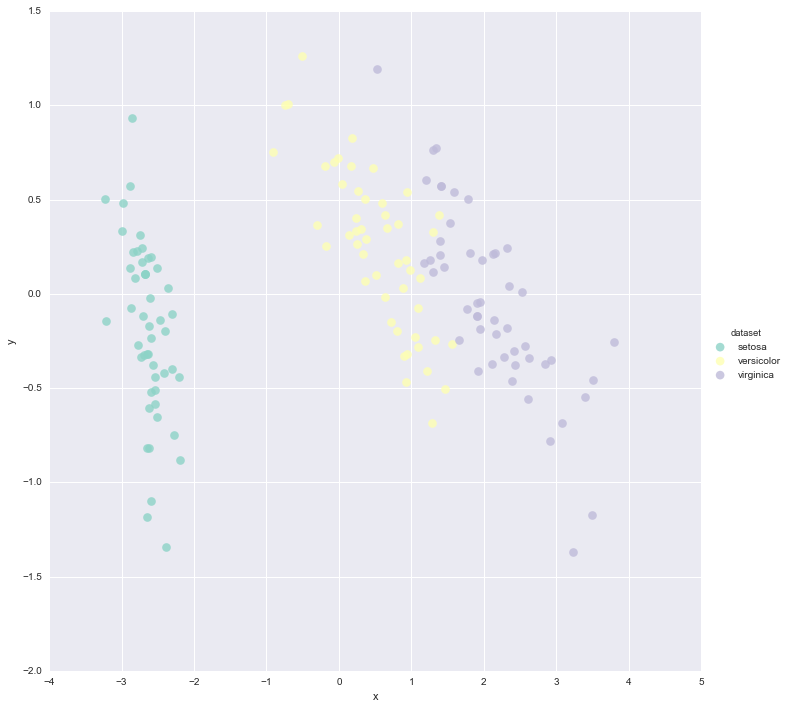

In [17]:
from sklearn.decomposition import PCA
from visualization_helper import plot_dataset

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

plot_dataset(X_new, iris.target_names[y])

*PCA* finds an optimal basis for your data such that you only need few to get a good representation of it.

In [18]:
print 'Explained variance= {1:.2f}% ({0})'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
print 'Components=\n{0}'.format(pca.components_)
print 'Components are orthogonal:', pca.components_[0].dot(pca.components_[1])
print 'Components have unit norm: {0:.1f} {1:.1f}'.format(np.sum(pca.components_[0]**2), np.sum(pca.components_[1]**2))
print ''
print 'Example:'
idx = 0
xi = X[idx]
xi = xi - pca.mean_
print xi, '=>', xi.dot(pca.components_.T), '=', X_new[idx]

Explained variance= 0.98% ([ 0.92461621  0.05301557])
Components=
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Components are orthogonal: -1.11022302463e-16
Components have unit norm: 1.0 1.0

Example:
[-0.74333333  0.446      -2.35866667 -0.99866667] => [-2.68420713 -0.32660731] = [-2.68420713 -0.32660731]


It is possible to see that the setosa class will be easy to separate, while the versicolor and virginica are harder.

We were able to see that previously with the pair-plot, but what would happen if instead of having 4 features we had 64? Let's try *PCA* on the digits dataset.

Explained variance= 0.29% ([ 0.14890594  0.13618771])


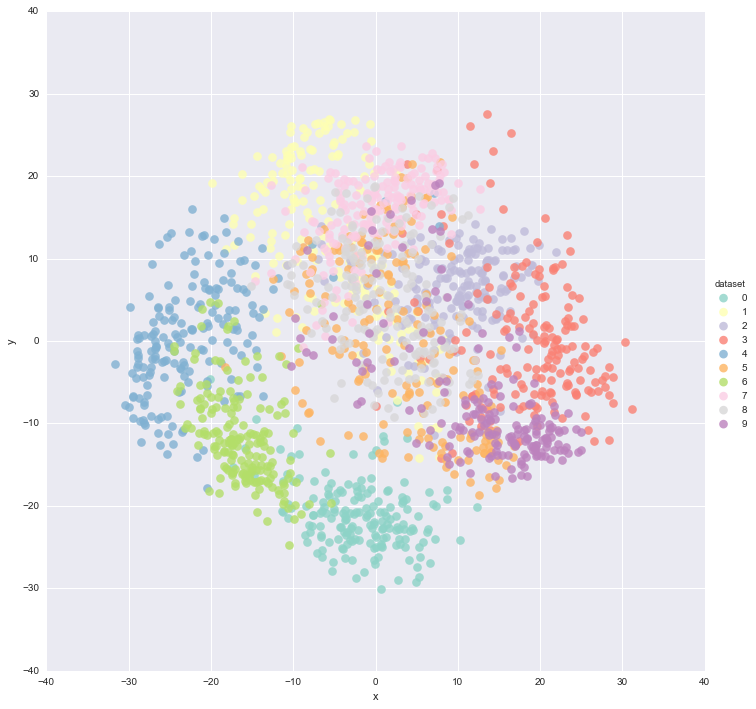

In [19]:
X, y = digits.data, digits.target

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

print 'Explained variance= {1:.2f}% ({0})'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
plot_dataset(X_new, y)

It is still hard to extract meaningful information, but we can at least see that the *0*s are somewhat more separated in space and should be easy to distinguish. There is also a lot of overlap between *7*s and *1*s as expected.

The overlap between points was expected since *PCA* was only able to explain $29\%$ of the variance. 

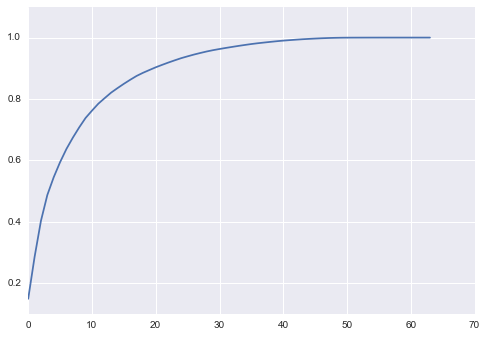

In [20]:
pca = PCA()
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_));

With 40 components almost all the variance is explained and with 50 it is really close to $100\%$. We could easily map the features into this reduced space as a preprocessing step for a classifier with enough confidence that we are not losing any important information.

**Note:** PCA also has an *inverse_transform* method that allows you to go from this 2-dimensional space back to the 64-dimensional one. This can be used to remove noise from the data, to perform regression or generate new samples.

Nonetheless, there are better methods to visualize the data than PCA, such as t-SNE (t-distributed Stochastic Neighbor Embedding). 

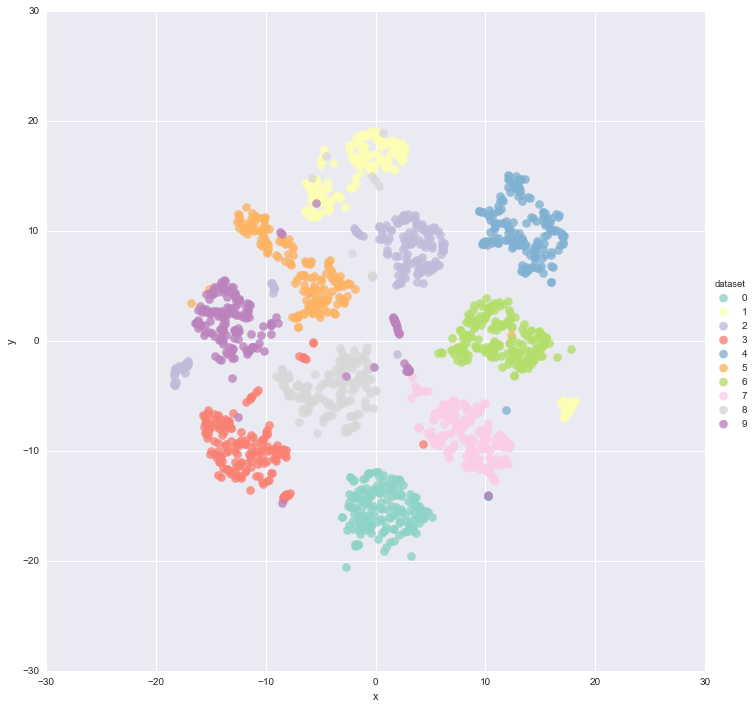

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_new = tsne.fit_transform(X)

plot_dataset(X_new, y)

The points are better separated now. We could run the K-means algorithm on top of this representation and achieve some good results, although t-SNE is better used for visualization and not as a preprocessing step for another estimator.

Now the *0*s are all clustered together and we can see what datapoints might be harder to distinguish.

## Common Interface ##

Most of the scikit-learn estimators offer a similar interface. The differences lie mostly on whether the estimators are *supervised* or *unsupervised*.

- **Supervised**:
 - model.predict(data): Returns an array containing the classes of every example in *data*.
 - model.predict_proba(data): Some estimators implement this method. For each example, returns the probability of belonging to each of the classes. The class with the highest probability is the one returned by the predict method.
 - model.score(data, labels): Returns a measure of how good the fit was. Scores lie between 0 and 1.
- **Unsupervised**:
 - model.predict(data): Some unsupervised estimators also implement the predict method. In this case, it returns the cluster of each example.
 - model.transform(data): Maps the data into the model's space.
 
Some estimators also implement the **fit_predict** or **fit_transform** for efficiency reasons.

### Exercise ###

2\. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) estimator plot the decision boundary. Compare it with SVM's. 

**Bonus:** Increase the C value and see the results. Look at the coef_ values.  
**Tip**: use the ```plot_proba_function``` method to plot the decision boundary.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from visualization_helper import plot_proba_function

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

#########################################################
#                       YOUR CODE                       #
#########################################################

#########################################################
#########################################################

Compare your solution with the one on exercise_solver.py.

3\. Use [sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to perform color compression. A pixel can have one of $256^{3}$ values, although most of these colors are unused on a single image. Cluster all the pixels of an image and transform it with this new representation.

**Tip:** The cluster\_centers\_ represent the color of the given clusters.

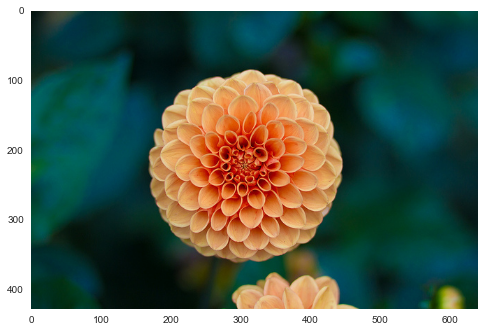

In [22]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
plt.imshow(flower)
plt.grid(False);

In [ ]:
from sklearn.cluster import KMeans
X = (flower / 255.0).reshape(-1, 3)

#########################################################
#                       YOUR CODE                       #
#########################################################

#########################################################
#########################################################

Compare your solution with the one on exercise_solver.py file.

## Create your own estimator ##

It might happen that you will need to implement your own estimator and want to use it within the scikit-learn environment. 

Let's see how to create a simple classifier (based on the developers [documentation](https://github.com/scikit-learn/scikit-learn/blob/master/doc/developers/contributing.rst)):

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
    
class NearestNeighbor(BaseEstimator, ClassifierMixin):
    
    def __init__(self, demo_argument=True):
        self.demo_argument = demo_argument

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Need to save classes_
        self.classes_ = unique_labels(y)
        
        # No actual fit. Just save the data.
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        # Check if fit had been called. This checks if X_ and y_ are set.
        check_is_fitted(self, ['X_', 'y_'])
        
        # Input validation. Check if X is a valid array and, if not, 
        # tries to convert it into one.
        X = check_array(X)
        
        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return self.y_[closest]

The easiest way of implementing an estimator is by inheriting from the BaseEstimator class that already takes care of the ```get_params``` and ```set_params``` methods. Also, BaseEstimator implements the ```__repr__``` method that takes care of pretty printing your estimator.

Some scikit-learn methods behave differently depending on the type of estimator they are working with. To distinguish between classifiers, regressors and clusterers, all estimators should have a ```_estimator_type``` attribute. If your estimator inherits from ```ClassifierMixin```, ```RegressorMixin``` or ```ClusterMixin``` you do not have to worry about that. There are other Mixins, if you are interested check the [code](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/base.py).

In [24]:
nn = NearestNeighbor()
nn._estimator_type

'classifier'

Scikit-learn has a way of checking the estimator you created. This ensures that the estimator is compatible with the scikit-learn interface and that you can use it in a Pipeline and with GridSearchCV as we will see later.

In [25]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(NearestNeighbor)

Also, the ```ClassifierMixin``` implements the ```score``` function, which returns the accuracy. You can override it inside your own estimator of course. Let's see how the ```NearestNeighbor``` estimator works on the digits dataset:

In [26]:
from sklearn.cross_validation import train_test_split

X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

nn.fit(X_train, y_train)
print 'Accuracy on test set: {0:.5f}'.format(nn.score(X_test, y_test))

Accuracy on test set: 0.98889


Let's compare our implementation with the *K-NearestNeighbor* classifier with ```k=1```:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print 'Accuracy on test set: {0:.5f}'.format(knn.score(X_test, y_test))

Accuracy on test set: 0.98889


As expected, both estimators achieved the same results, meaning that our implementation is correct!

## Conclusion ##

Here is a flow chart provided by scikit-learn to help you choose the best algorithm depending on the situation.

![Scikit-Learn Flow Chart](http://scikit-learn.org/dev/_static/ml_map.png "Scikit-Learn Flow Chart")